In [1]:
import random

Definition of our target individual known from the start :  <br/>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 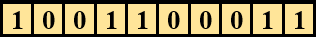


In [17]:
TARGET_CHROMOSOME = [1, 0, 0, 1, 1, 0, 0, 0, 1, 1]

Definition of parameters :

In [23]:
POPULATION_SIZE = 15
NB_GENES = len(TARGET_CHROMOSOME)
MUTATION_RATE = 0.2
CROSSING_RATE = 0.7

Class modeling our individual

```
# Ce texte est au format code
```



In [67]:
class Chromosome:
    #chromosome initialisation 
    def __init__(self):
        self.genes = []
        self.fitness = 0
        i = 0
        while i < NB_GENES:
            self.genes.append(random.randint(0,1))
            i += 1

    #chromosom genes
    def get_genes(self):
        return self.genes

    #fitness function
    def get_fitness(self):
        self.fitness = 0
        for i in range(NB_GENES):
            if(self.genes[i] == TARGET_CHROMOSOME[i]):
                self.fitness += 1
        return self.fitness

    def __str__(self):
        return self.genes.__str__()

    def __repr__(self):
      return "\n"+self.genes.__str__()

In [68]:
Indiv1 = Chromosome()
Indiv2 = Chromosome()
print(Indiv1.genes)
print("fitness du premier individue : {}".format(Indiv1.get_fitness()))
print(Indiv2.genes)
print("fitness du deuxiéme individue : {}".format(Indiv2.get_fitness()))

[1, 1, 1, 0, 1, 1, 1, 1, 1, 0]
fitness du premier individue : 3
[1, 0, 0, 0, 1, 1, 1, 0, 1, 0]
fitness du deuxiéme individue : 6


Class modeling our population based on the number of individuals

In [74]:
class Population:
    #Population Initialisation
    def __init__(self, size):
        self.chromosomes = []
        i = 0
        while i < size :
            self.chromosomes.append( Chromosome() )
            i += 1
        self.chromosomes.sort(key=lambda x: x.get_fitness(), reverse=True)

    #Get all population chromosomes
    def get_chromosomes(self):
        return self.chromosomes

    def print_population(self, gen_number):
        print("\n-----------------------Generation Summary---------------------------")
        print("--------------------------------------------------------------------")
        print("Generation #", gen_number, "| Fittest chromosome fitness:", self.get_chromosomes()[0].get_fitness())
        print("Target chromosome", TARGET_CHROMOSOME)
        print("--------------------------------------------------------------------")
        i = 0
        for x in self.get_chromosomes():
            print("Chromosome #",i," :",x,"| Fitness", x.get_fitness())
            i += 1

In [71]:
P = Population(POPULATION_SIZE)
print(P.chromosomes[:])

[
[1, 0, 0, 0, 1, 1, 0, 0, 1, 1], 
[1, 1, 0, 1, 0, 0, 1, 0, 1, 1], 
[1, 0, 0, 0, 1, 1, 1, 0, 0, 1], 
[0, 0, 1, 0, 0, 0, 0, 0, 1, 0], 
[0, 1, 1, 0, 1, 0, 0, 0, 0, 1], 
[1, 1, 0, 1, 0, 1, 0, 1, 1, 0], 
[0, 0, 0, 1, 0, 1, 0, 1, 1, 0], 
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1], 
[1, 0, 0, 0, 1, 1, 1, 1, 0, 0], 
[1, 1, 1, 1, 1, 1, 0, 1, 0, 0], 
[1, 0, 0, 0, 0, 1, 1, 0, 0, 0], 
[0, 1, 0, 0, 1, 0, 1, 1, 0, 0], 
[1, 1, 1, 0, 0, 0, 1, 1, 1, 0], 
[0, 0, 0, 0, 0, 1, 1, 1, 0, 1], 
[0, 0, 1, 0, 0, 1, 1, 0, 0, 0]]


In [73]:
P = Population(POPULATION_SIZE)
P.print_population(0)


-----------------------Generation Summary---------------------------
--------------------------------------------------------------------
Generation # 0 | Fittest chromosome fitness: 6
Target chromosome [1, 0, 0, 1, 1, 0, 0, 0, 1, 1]
--------------------------------------------------------------------
Chromosome # 0  : [1, 1, 0, 0, 0, 1, 0, 0, 1, 1] | Fitness 6
Chromosome # 1  : [1, 0, 1, 1, 1, 1, 0, 1, 0, 1] | Fitness 6
Chromosome # 2  : [0, 1, 1, 0, 1, 0, 0, 0, 1, 1] | Fitness 6
Chromosome # 3  : [0, 0, 0, 1, 0, 1, 1, 1, 1, 1] | Fitness 5
Chromosome # 4  : [1, 0, 1, 1, 1, 0, 1, 1, 0, 0] | Fitness 5
Chromosome # 5  : [0, 1, 0, 1, 1, 0, 1, 1, 0, 1] | Fitness 5
Chromosome # 6  : [1, 1, 1, 1, 1, 0, 1, 1, 1, 0] | Fitness 5
Chromosome # 7  : [1, 1, 0, 0, 1, 1, 0, 1, 1, 0] | Fitness 5
Chromosome # 8  : [0, 1, 0, 1, 0, 1, 0, 0, 1, 0] | Fitness 5
Chromosome # 9  : [0, 1, 0, 0, 0, 0, 0, 0, 1, 0] | Fitness 5
Chromosome # 10  : [0, 0, 0, 0, 0, 0, 1, 1, 0, 1] | Fitness 4
Chromosome # 11  : [0, 1

Wheel selection

In [75]:
def select_Wheel(pop):
    partialSum = 0
    sumFitness = 0
    for chromosome in pop.get_chromosomes():
        sumFitness += chromosome.get_fitness()

    randomShot = random.random() * sumFitness

    i = -1
    while partialSum < randomShot and i < POPULATION_SIZE-1 :
        i += 1
        partialSum += pop.get_chromosomes()[i].get_fitness()

    return pop.get_chromosomes()[i]

One point crossover <br/>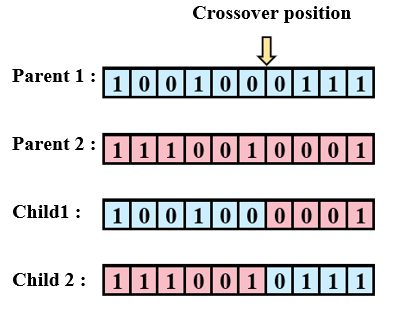

In [76]:
def crossover_chromosomes(parent1, parent2):
    if random.random() < CROSSING_RATE: 
        child1 = Chromosome()
        child2 = Chromosome()

        '''One Point Cross Over'''
        index = random.randrange(1, NB_GENES-1)
        child1.genes = parent1.get_genes()[:index] + parent2.get_genes()[index:]
        child2.genes = parent2.get_genes()[:index] + parent1.get_genes()[index:]

        print("\nMaking a cross")
        print("Parent1: ",parent1.get_genes())
        print("Parent2: ",parent2.get_genes())
        print("Child1 : ", child1.get_genes())
        print("Child1 : ", child2.get_genes())

        return child1, child2
    else:
        return parent1, parent2

One bit mutation <br/>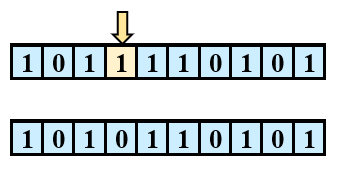

In [77]:
def mutate_chromosome(chromosome):
    if random.random() < MUTATION_RATE:
        print("\nMaking a mutation")
        print("From: ",chromosome.get_genes())

        random_bit_position = random.randrange(0,NB_GENES)
        if chromosome.get_genes()[random_bit_position] == 0:
            chromosome.get_genes()[random_bit_position] = 1
        else:
            chromosome.get_genes()[random_bit_position] = 0

        print("To:   ",chromosome.get_genes())

Evolve our generation by using the wheel selection, crossover and the mutation

In [83]:
def evolve(pop):
    new_pop = Population(0)

    print("\nCrossover and Mutation Trace:")
    while new_pop.get_chromosomes().__len__() < POPULATION_SIZE:
        parent1 = select_tournament(pop)
        parent2 = select_tournament(pop)


        child1, child2 = crossover_chromosomes(parent1, parent2)


        mutate_chromosome(child1)
        mutate_chromosome(child2)


        new_pop.get_chromosomes().append(child1)
        
        if len(new_pop.get_chromosomes()) < POPULATION_SIZE:
            new_pop.get_chromosomes().append(child2)

    new_pop.get_chromosomes().sort(key=lambda x: x.get_fitness(), reverse=True)   
    return new_pop

In [82]:
p= Population(0)
P.print_population(0)
new_pop = evolve(P)
new_pop.print_population(1)


-----------------------Generation Summary---------------------------
--------------------------------------------------------------------
Generation # 0 | Fittest chromosome fitness: 6
Target chromosome [1, 0, 0, 1, 1, 0, 0, 0, 1, 1]
--------------------------------------------------------------------
Chromosome # 0  : [1, 1, 0, 0, 0, 1, 0, 0, 1, 1] | Fitness 6
Chromosome # 1  : [1, 0, 1, 1, 1, 1, 0, 1, 0, 0] | Fitness 5
Chromosome # 2  : [0, 1, 1, 0, 1, 1, 0, 0, 1, 1] | Fitness 5
Chromosome # 3  : [0, 0, 0, 1, 0, 1, 1, 1, 1, 1] | Fitness 5
Chromosome # 4  : [1, 0, 1, 1, 1, 0, 1, 1, 0, 0] | Fitness 5
Chromosome # 5  : [0, 1, 0, 1, 1, 0, 1, 1, 0, 1] | Fitness 5
Chromosome # 6  : [1, 1, 1, 1, 1, 0, 1, 1, 1, 0] | Fitness 5
Chromosome # 7  : [1, 1, 0, 0, 1, 1, 0, 1, 1, 0] | Fitness 5
Chromosome # 8  : [0, 1, 0, 1, 0, 1, 0, 0, 1, 0] | Fitness 5
Chromosome # 9  : [0, 1, 0, 0, 0, 0, 0, 0, 1, 0] | Fitness 5
Chromosome # 10  : [0, 0, 0, 0, 0, 0, 1, 1, 0, 1] | Fitness 4
Chromosome # 11  : [0, 1

Main program

In [84]:
generation_number = 0
MAX_FITNESS = TARGET_CHROMOSOME.__len__()
population = Population(POPULATION_SIZE)
population.print_population(generation_number)

while population.get_chromosomes()[0].get_fitness() < MAX_FITNESS :
    generation_number += 1
    population = evolve(population)
    population.print_population(generation_number)


-----------------------Generation Summary---------------------------
--------------------------------------------------------------------
Generation # 0 | Fittest chromosome fitness: 8
Target chromosome [1, 0, 0, 1, 1, 0, 0, 0, 1, 1]
--------------------------------------------------------------------
Chromosome # 0  : [1, 1, 0, 1, 1, 0, 1, 0, 1, 1] | Fitness 8
Chromosome # 1  : [1, 0, 0, 1, 1, 0, 1, 0, 0, 1] | Fitness 8
Chromosome # 2  : [1, 1, 0, 1, 1, 0, 0, 1, 0, 1] | Fitness 7
Chromosome # 3  : [1, 1, 1, 1, 1, 0, 0, 1, 1, 0] | Fitness 6
Chromosome # 4  : [1, 0, 0, 0, 0, 1, 0, 1, 1, 1] | Fitness 6
Chromosome # 5  : [1, 1, 1, 1, 0, 0, 1, 1, 1, 1] | Fitness 5
Chromosome # 6  : [1, 1, 1, 0, 0, 0, 1, 0, 0, 1] | Fitness 4
Chromosome # 7  : [0, 1, 1, 0, 1, 0, 0, 1, 0, 1] | Fitness 4
Chromosome # 8  : [0, 1, 1, 1, 0, 0, 0, 1, 0, 1] | Fitness 4
Chromosome # 9  : [0, 0, 1, 1, 0, 1, 1, 1, 0, 1] | Fitness 3
Chromosome # 10  : [1, 1, 1, 0, 0, 1, 1, 0, 1, 0] | Fitness 3
Chromosome # 11  : [0, 0

The closest individual

In [85]:
population.chromosomes[0]


[1, 0, 0, 1, 1, 0, 0, 0, 1, 1]